In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv"
dados_raw = pd.read_csv(uri)
dados_raw.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [ ]:
a_renomear = {
    "mileage_per_year" : "milhas_por_ano",
    "model_year" : "ano_do_modelo",
    "price" : "preco",
    "sold" : "vendido"
}

dados = dados_raw.rename(columns = a_renomear)
dados.tail()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
9995,9995,15572,2006,97112.86,no
9996,9996,13246,2002,107424.63,yes
9997,9997,13018,2014,93856.99,no
9998,9998,10464,2011,51250.57,yes
9999,9999,12362,1999,87945.73,no


In [ ]:
dados.vendido = dados.vendido.map({"yes": 1, "no": 0})
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [ ]:
mais_velho = dados.ano_do_modelo.min()
mais_velho

1998

In [ ]:
from datetime import datetime

ano_atual = datetime.today().year

dados["idade_do_modelo"] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [ ]:
dados["km_por_ano"] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [ ]:
dados = dados.drop(columns = ["Unnamed: 0",	"milhas_por_ano",	"ano_do_modelo"], axis = 1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [ ]:
#Tentando usar o LinearSVC:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

x = dados[["preco", "idade_do_modelo", "km_por_ano"]]
y = dados["vendido"]

seed = 20 
np.random.seed(seed)
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)
print(f"Treinamos com {len(treino_x)} e testamos com {len(teste_x)} elementos")
model = LinearSVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_de_acertos = accuracy_score(teste_y, previsoes)
print(f"Taxa de acertos: {round(taxa_de_acertos*100)} %")

Treinamos com 7500 e testamos com 2500 elementos
Taxa de acertos: 57 %


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


In [ ]:
#algoritmo de base: DummyClassifier
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()

dummy_stratified.fit(treino_x, treino_y)
previsoes = dummy_stratified.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100

print(f"Taxa de acertos do dummy_stratified: {round(acuracia)} %")

Taxa de acertos do dummy_stratified: 58 %


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_mostfrequent = DummyClassifier(strategy="most_frequent")

dummy_mostfrequent.fit(treino_x, treino_y)
dummy_mostfrequent.score(teste_x, teste_y) * 100  #não preciso importar o accuracy_score, posso usar o score direto!

57.99999999999999

In [ ]:
#Tentando usar o SVC:
#lembrando que o uso do SVC eu preciso usar o standardScale
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler 

seed = 5 
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)

scaler = StandardScaler()

scaler.fit(raw_treino_x) 
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

print(f"Treinamos com {len(treino_x)} e testamos com {len(teste_x)} elementos")

model = SVC()
model.fit(treino_x, treino_y)
previsoes = model.predict(teste_x)
taxa_de_acertos = accuracy_score(teste_y, previsoes)
print(f"Taxa de acertos: {round(taxa_de_acertos*100, 1)} %")

data_x = teste_x[:,0]
data_y = teste_x[:,1]

x_min = data_x.min()          
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max, y_min, y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max-x_min)/ pixels)
eixo_y = np.arange(y_min, y_max, (y_max-y_min)/ pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)

Treinamos com 7500 e testamos com 2500 elementos
Taxa de acertos: 77.5 %
-2.4634555152527393 2.066057457186565 -2.7447346284374117 1.3091690888989667


In [ ]:
#É dificil interpretar os algoritmos de classificação, como o Support Vector Machine (LinearSVC e SVC que vimos) por exemplo ( é uma caixa preta). 
#Quais são os critérios, as regras, que levam o modelo as tomadas de decisões e ao automóvel ser vendido ou não?

In [ ]:
#Existem outros algoritmos que facilitam essa indentificação, as regras, como por exemplo o DecisionTree
from sklearn.tree import DecisionTreeClassifier

seed = 5 
np.random.seed(seed)
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25,
                                                        stratify = y)

print(f"Treinamos com {len(raw_treino_x)} e testamos com {len(raw_teste_x)} elementos")

model = DecisionTreeClassifier(max_depth = 3)  #max_depth -> profundidade, "nº máximo de saltos" até decidir (apenas para visualizar melhor a árvore, as vezes é interessante deixar default)
model.fit(raw_treino_x, treino_y)
previsoes = model.predict(raw_teste_x)
taxa_de_acertos = accuracy_score(teste_y, previsoes)
print(f"Taxa de acertos: {round(taxa_de_acertos*100, 1)} %")

#NÃO preciso usar o Scaler e normalização no DecisionTreeClassifier

Treinamos com 7500 e testamos com 2500 elementos
Taxa de acertos: 79.3 %


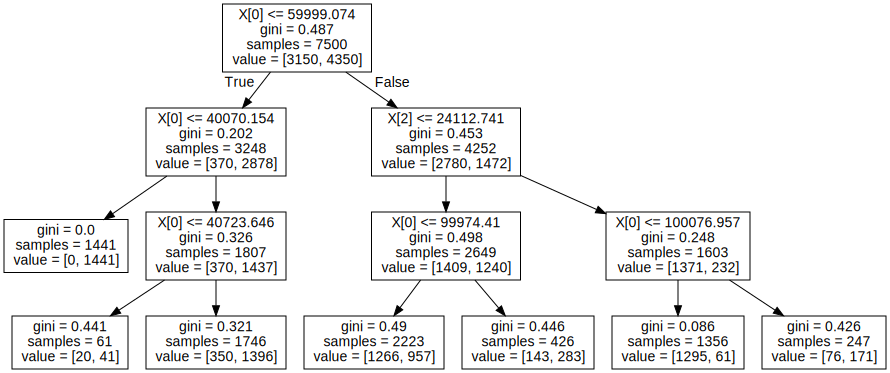

In [ ]:
#Consigo uma visualização gráfica!
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None)  #devolve um formato dot_data
grafico = graphviz.Source(dot_data)
grafico

In [ ]:
#quem é X[0]?, X[2]?


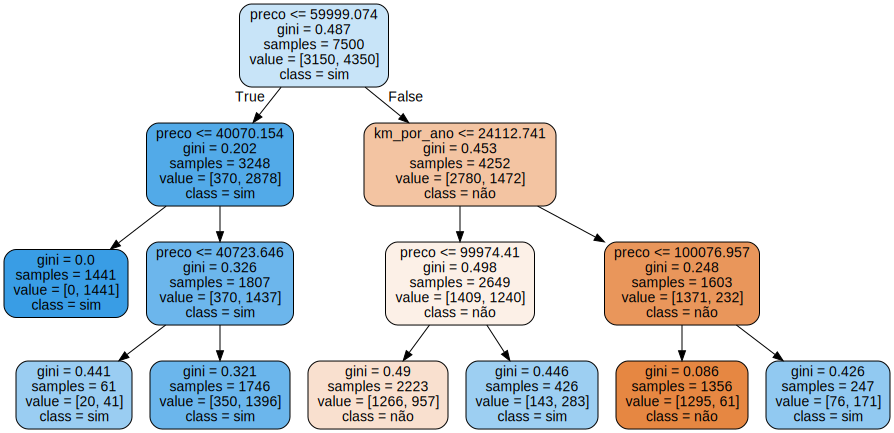

In [ ]:
features = x.columns
dot_data = export_graphviz(model, out_file=None,
                           filled = True, rounded = True,
                           feature_names = features,
                           class_names = ["não", "sim"])  #devolve um formato dot_data
grafico = graphviz.Source(dot_data)
grafico